In [4]:
import lib.RayTracer as RT
import math
import numpy as np
import time
from PIL import Image
from stl import mesh

#define render window size
(w, h) = (640, 480)

# Test raytracer

In [5]:
# Using an existing stl file:
your_mesh = mesh.Mesh.from_file('models/block100.stl')
your_mesh.v0

array([[  0., 100., 100.],
       [  0.,   0., 100.],
       [100., 100., 100.],
       [100.,   0., 100.],
       [100., 100.,   0.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0.,   0.],
       [100., 100., 100.],
       [  0., 100., 100.],
       [100.,   0.,   0.],
       [  0.,   0.,   0.]], dtype=float32)

Created mesh.
finished unpacking
[<lib.RayTracer.Sphere object at 0x1085e5a50>, <lib.RayTracer.Sphere object at 0x1085e5cf0>, <lib.RayTracer.CheckeredSphere object at 0x1085e5b10>, <lib.RayTracer.Triangle object at 0x10654f160>, <lib.RayTracer.Triangle object at 0x10654f910>, <lib.RayTracer.Triangle object at 0x10654ebf0>, <lib.RayTracer.Triangle object at 0x10654e950>, <lib.RayTracer.Triangle object at 0x10654ee60>, <lib.RayTracer.Triangle object at 0x10654e350>, <lib.RayTracer.Triangle object at 0x10654cbe0>, <lib.RayTracer.Triangle object at 0x10654da80>, <lib.RayTracer.Triangle object at 0x10654e080>, <lib.RayTracer.Triangle object at 0x10654f250>, <lib.RayTracer.Triangle object at 0x10654cfa0>, <lib.RayTracer.Triangle object at 0x10654fc40>]
-0.6424925662032355 0.41762016803210306 0.6424925662032355
Vec3| x: [0.] y: [0.35] z: [-1.] Vec3| x: [0.75] y: [0.1] z: [1.]
(307200,)
-1.3974213314920372 4.265 0.6987106657460186 0.6987106657460186
34310
-0.6424925662032355 0.4176201680321030

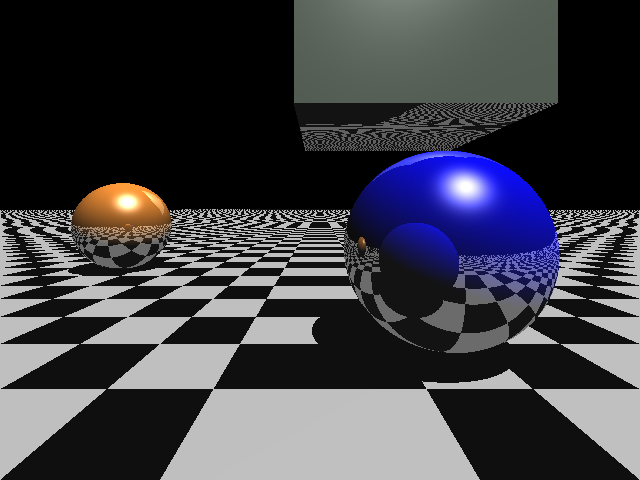

In [6]:
#     Sphere(vec3(.75, .1, 1), .6, rgb(0, 0, 1)),
#     Sphere(vec3(-.75, .1, 2.25), .6, rgb(.5, .223, .5)),
#     Sphere(vec3(-2.75, .1, 3.5), .6, rgb(1, .572, .184)),
# 	Triangle(vec3(-0.3, -0.1, 1), vec3(-0.4, .5, .5), vec3(-0.35, .5, 2), None, rgb(1, 0.6, 0), 0.9),
# 	Triangle(vec3(-0.3, -0.1, 1), vec3(-0.35, .5, 2), vec3(3, 0.4, 2.5), None, rgb(1, 1, 1), 0.9),
# CheckeredSphere(vec3(0, -99999.5, 0), 99999, rgb(.75, .75, .75), 0.25),


scene = [
	RT.Sphere(RT.vec3(.75, .1, 1), .6, RT.rgb(0, 0, 1)),
	RT.Sphere(RT.vec3(-2.75, .1, 3.5), .6, RT.rgb(1, .572, .184)),
	RT.CheckeredSphere(RT.vec3(0, -99999.5, 0), 99999, RT.rgb(.75, .75, .75), 0.25),
	RT.Mesh(RT.vec3(-10, 40, 120),
	     mesh.Mesh.rotation_matrix(np.array([1, 0, 0]), math.radians(0)),
	     your_mesh,
	     RT.rgb(.7, .8, .7), 0.5)
]

# unpack scene (mesh into triangles)
offset = 0
for i in range(len(scene)):
	if scene[i].type == 2:
		for t in scene[i].tArray:
			scene.insert(i, t)
			offset += 1
		scene.pop(i+offset)
print("finished unpacking")
print(scene)
# finish unpacking

r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

t0 = time.time()
Q = RT.vec3(x, y, 0)
color = RT.raytrace(RT.E, (Q - RT.E).norm(), scene)
print ("Took", time.time() - t0)

rgb = [Image.fromarray((255 * np.clip(c, 0, 1).reshape((h, w))).astype(np.uint8), "L") for c in color.components()]
display(Image.merge("RGB", rgb))

In [7]:
import lib.World as W
import math
import numpy as np
import time
from PIL import Image
from stl import mesh

FARAWAY = 1.0e+39

[[ 1.25 -0.75 -0.   -0.  ]
 [-0.75  1.25  0.    0.  ]
 [-0.    0.    1.    0.  ]
 [-0.    0.    0.    1.  ]]
[[ 3.0833335 -2.9166667  0.         0.       ]
 [-2.9166667  3.0833335  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 1.2500002 -0.7500002  0.         0.       ]
 [-0.7499998  1.2500004  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[[-1.80e+08]
 [ 1.92e+08]
 [ 0.00e+00]]
[-0.64249257  0.41762017  0.64249257]
[ 0.    0.35 -1.  ] [0.75 0.1  1.  ]
(307200,)
4.26499988079071
()
-1.3974213273423655 4.26499988079071 0.6987106636711827 0.6987106636711827
34310
1 (307200,)
(307200,)
(307200, 3) (307200, 3)


In [8]:
source = np.array((0, 0.35, -1))

w, h = (640, 480)
r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

coords = np.stack((x, y, np.zeros(x.shape[0])), axis=0)
dirs = coords - source[:, np.newaxis]

In [9]:
m = mesh.Mesh.from_file('models/sphere.stl')
direction = dirs

In [10]:
frame = W.Frame((0, 0, 0))
obj = W.MeshObject([0, 0, 0], frame, m, (0,))

In [11]:
arr1 = obj.intersect(source, direction)

In [12]:
direction

array([[-1.        , -0.99687011, -0.99374022, ...,  0.99374022,
         0.99687011,  1.        ],
       [ 0.65      ,  0.65      ,  0.65      , ..., -0.85      ,
        -0.85      , -0.85      ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [ ]:
arr2 = obj.np_intersect(source, direction)

In [ ]:
eee = ed[:, np.newaxis, :]

In [ ]:
eee.shape

(228, 1, 3)

In [ ]:
np.cross(eee, v).shape

(228, 307200, 3)

In [ ]:
np.min(arr1)

1.0

In [ ]:
np.min(arr2)

1.0

In [ ]:
(arr2 == arr1).all()

True